# Uber Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## A) Dataset

In [98]:
df = pd.read_csv('My Uber Drives - 2016.csv')
df.head()

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,1/1/2016 21:11,1/1/2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,1/2/2016 1:25,1/2/2016 1:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,1/2/2016 20:25,1/2/2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,1/5/2016 17:31,1/5/2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,1/6/2016 14:42,1/6/2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1156 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1156 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [4]:
df.isna().sum()

START_DATE*      0
END_DATE*        1
CATEGORY*        1
START*           1
STOP*            1
MILES*           0
PURPOSE*       503
dtype: int64

In [5]:
df.fillna('Not_Provided',inplace=True)
df.isna().sum()

START_DATE*    0
END_DATE*      0
CATEGORY*      0
START*         0
STOP*          0
MILES*         0
PURPOSE*       0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [102]:
df.drop(index=df.index[-1], axis=0, inplace=True)
df.shape

(1154, 8)

## Comments
The dataset consisits of 8 columns and 1154 rows.

Most of columns had NaN objects but were replaced with 'Not_Provided'

Only 1 duplicated item (Removed).

Numerical Columns:
MILES

Non-Numerical Columns:
START_DATE-END_DATE-CATEGORY-START-STOP-PURPOSE

## -------------------------------------------------------------------------------------

## B) Data Visualization

[Text(0.5, 1.0, 'Outliers: Miles')]

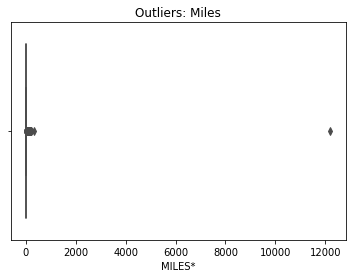

In [11]:
# detecting the outliers

sns.boxplot(x='MILES*', data=df, color='blue').set(title='Outliers: Miles')

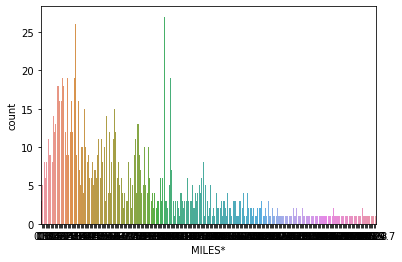

In [18]:
sns.countplot(data=df,x="MILES*")

In [20]:
#Long Rides
df[df['MILES*']>12000]

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1155,Totals,Not_Provided,Not_Provided,Not_Provided,Not_Provided,12204.7,Not_Provided


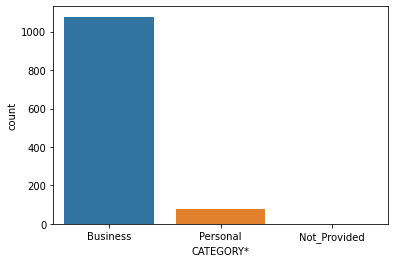

In [24]:
# Differentiating between customers according to category
sns.countplot(x='CATEGORY*',data=df)

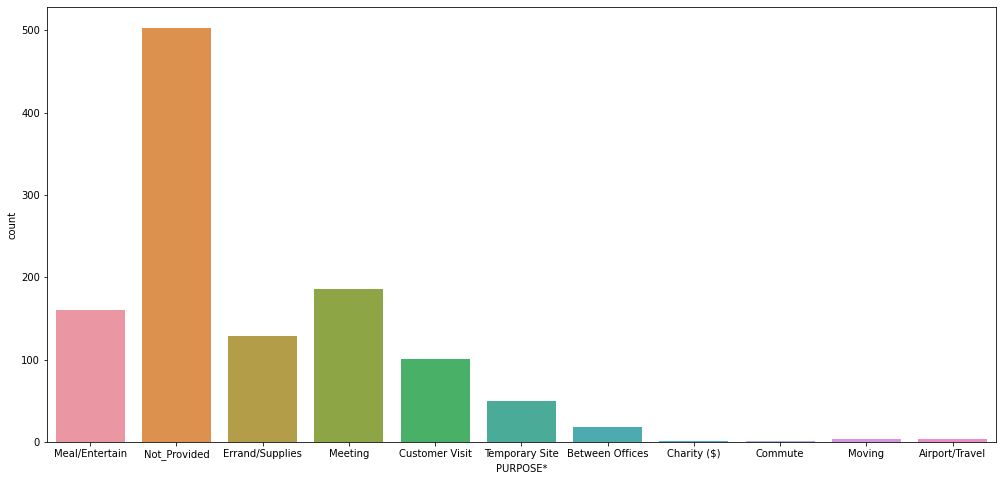

In [33]:
# Differentiating between customers according to purpose
plt.figure(figsize=(17, 8))
sns.countplot(x='PURPOSE*',data=df)

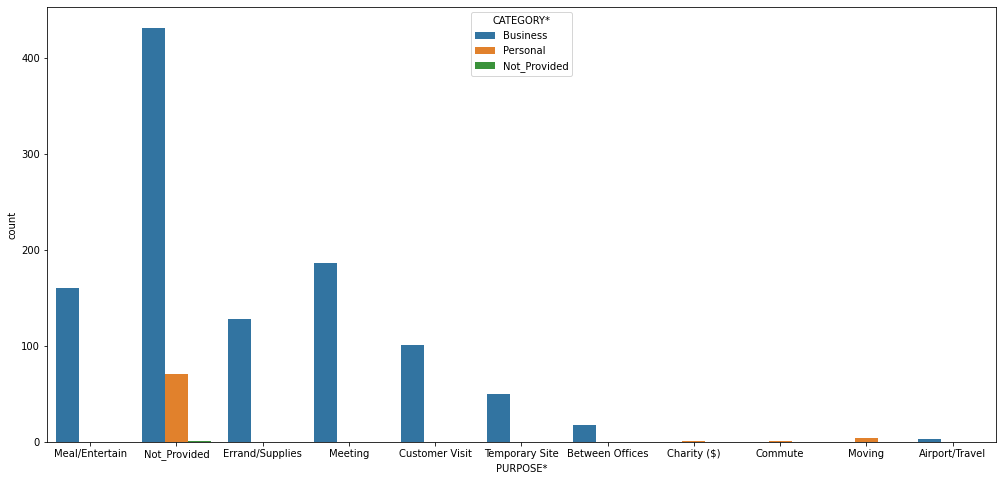

In [38]:
plt.figure(figsize=(17, 8))
sns.countplot(data=df,x='PURPOSE*',hue='CATEGORY*')

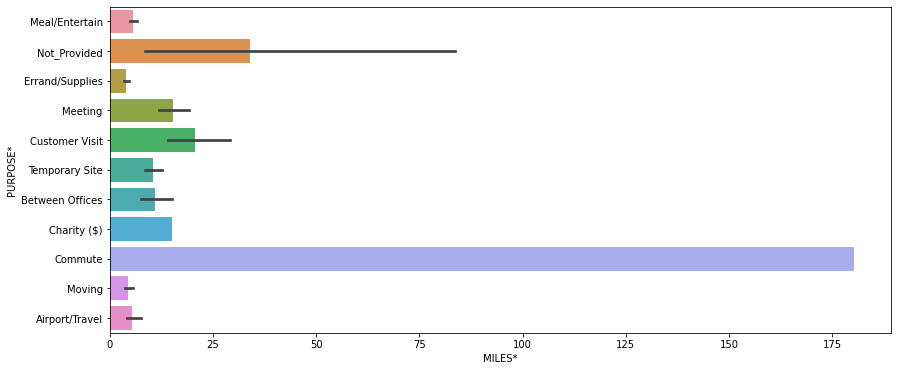

In [40]:
plt.figure(figsize=(14, 6))
sns.barplot(data = df, y = 'PURPOSE*', x = 'MILES*')

In [81]:
# Highest Areas to start trips from
start_df = df['START*'].value_counts().nlargest(10)
start_df

# Highest Areas to end trips at
end_df = df['STOP*'].value_counts().nlargest(10)
end_df

Cary                202
Unknown Location    149
Morrisville          84
Whitebridge          65
Islamabad            58
Lahore               36
Durham               36
Raleigh              29
Kar?chi              26
Apex                 17
Name: STOP*, dtype: int64

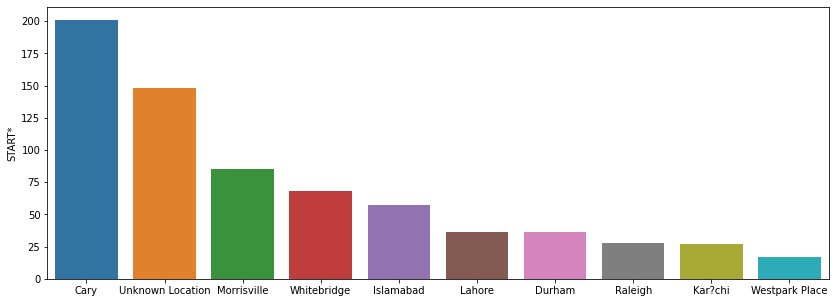

In [85]:
# Highest Areas to start trips from
plt.figure(figsize=(14, 5))
sns.barplot(x=start_df.index,y=start_df)

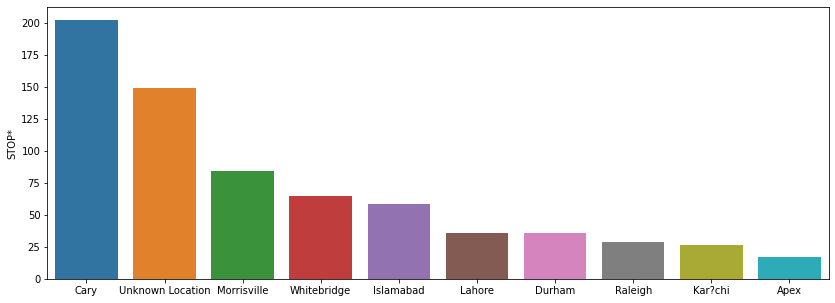

In [86]:
# Highest Areas to end trips at
plt.figure(figsize=(14, 5))
sns.barplot(x=end_df.index,y=end_df)

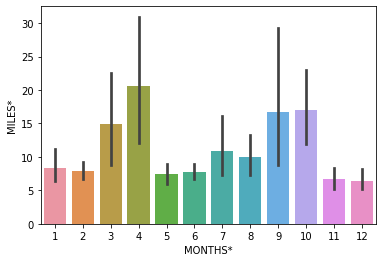

In [103]:
df['MONTHS*']=pd.DatetimeIndex(data=df['START_DATE*']).month
sns.barplot(data=df,x="MONTHS*",y="MILES*")
#Most Miles are covered in April

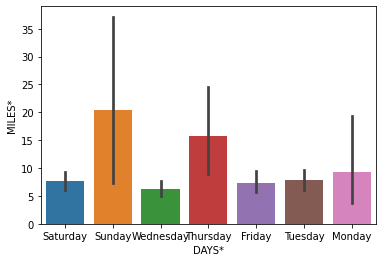

In [114]:
df['DAYS*']=pd.DatetimeIndex(data=df['START_DATE*']).day
df['DAYS*'] = df['DAYS*'].map({1:'Saturday',2:'Sunday',3:'Monday',4:'Tuesday',5:'Wednesday',6:'Thursday',7:'Friday'})
sns.barplot(data=df,x="DAYS*",y="MILES*")
#Most Miles are covered in Sunday